### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import re
from nltk import *
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense
from keras.models import Sequential
from transformers import BertTokenizer
from sklearn.decomposition import PCA

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS/NLP/Project/fake_job_postings.csv')

In [3]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


### Data Preprocessing

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,17880.0,NaN,NaN,NaN,8940.5,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
title,17880,11231,English Teacher Abroad,311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,17534,3105,"GB, LND, London",718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,6333,1337,Sales,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_range,2868,874,0-0,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_profile,14572,1709,We help teachers get safe &amp; secure jobs ab...,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,17879,14801,"Play with kids, get paid for it Love travel? J...",379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requirements,15185,11968,University degree required. TEFL / TESOL / CEL...,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
benefits,10670,6205,See job description,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
telecommuting,17880.0,NaN,NaN,NaN,0.042897,0.202631,0.0,0.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<ipython-input-8-f044f2f5ad42>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


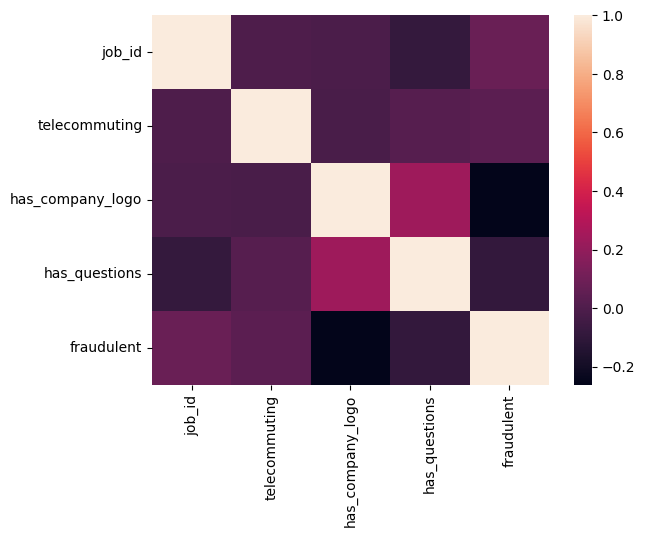

In [8]:
sns.heatmap(df.corr());

In [9]:
df.isna().mean()*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [10]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [11]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MS/NLP/Project/emscad_v1.csv')

In [12]:
df1

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


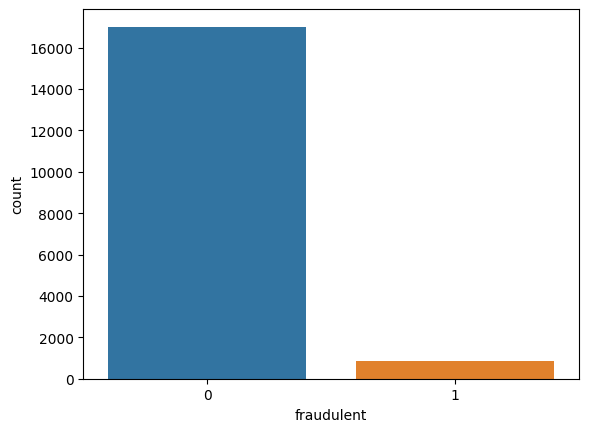

In [13]:
# The count plot of fraduent records, we could say that the data is highly imbalanced.
sns.countplot(x='fraudulent',data=df);

In [14]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Data Wrangling

In [15]:
df['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

<Axes: xlabel='department', ylabel='count'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


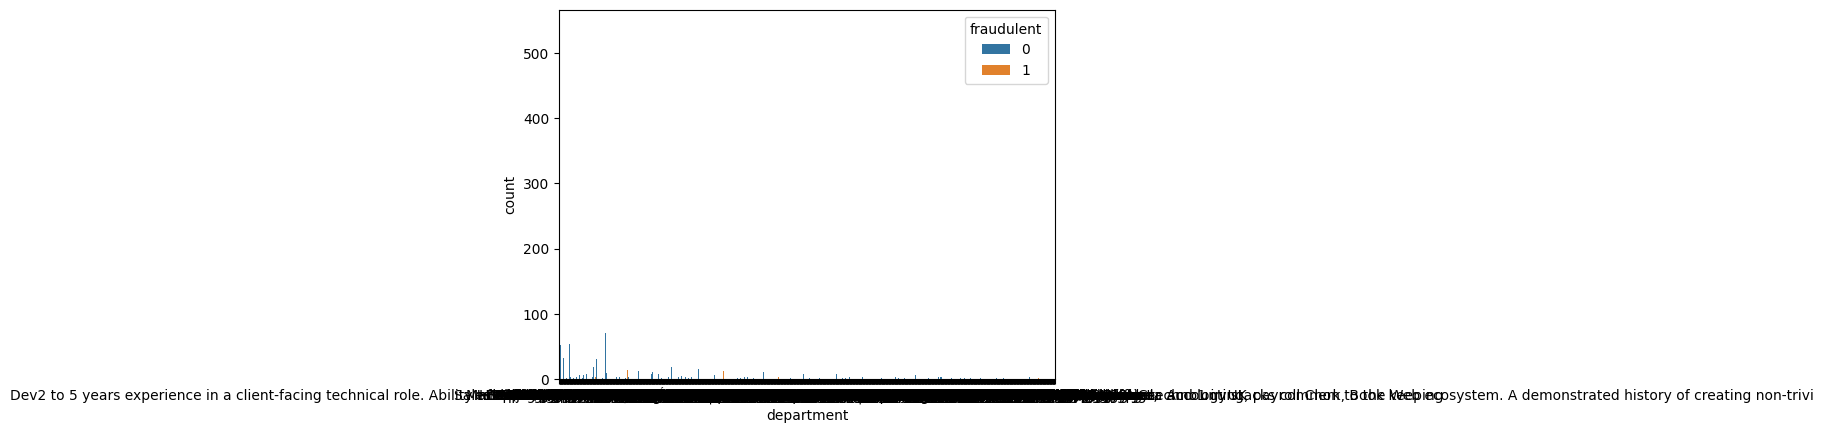

In [16]:
# as there are many departments in the entire data, the plot is adjusted later
sns.countplot(x=df['department'],hue=df['fraudulent'])

In [17]:
pd.crosstab(df['department'],df['fraudulent'])

fraudulent,0,1
department,,
,6,0
\tCorporate Shared Services,0,1
Lower Level Management,1,0
Marketing,1,0
Moni Technologies,1,0
...,...,...
warehouse,3,0
web development,1,0
Área Comercial,1,0


In [18]:
df['department'].nunique()

1337

In [19]:
df['title'].nunique()

11231

In [20]:
df['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [21]:
df['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [22]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

### Exploratory Data Anlaysis

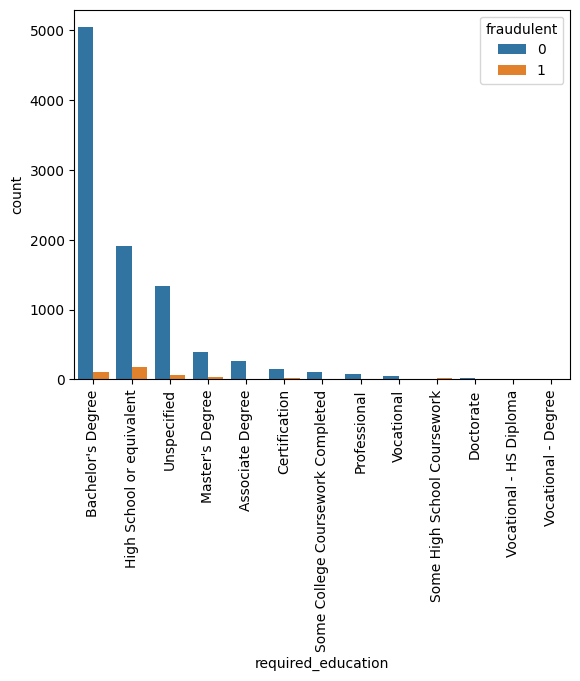

In [23]:
# Fraud posts based on education required
sns.countplot(x=df['required_education'],hue=df['fraudulent'],order=df['required_education'].value_counts().index)
plt.xticks(rotation=90);

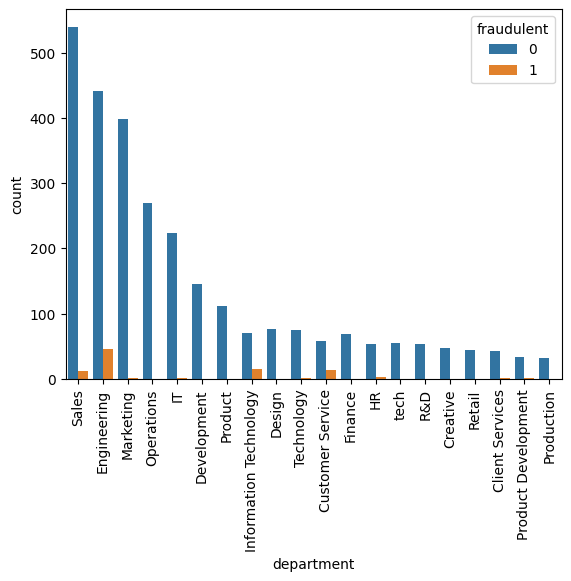

In [24]:
# Fraud posts based on top departments
sns.countplot(x=df['department'],hue=df['fraudulent'],order=df['department'].value_counts().iloc[:20].index)
plt.xticks(rotation=90);

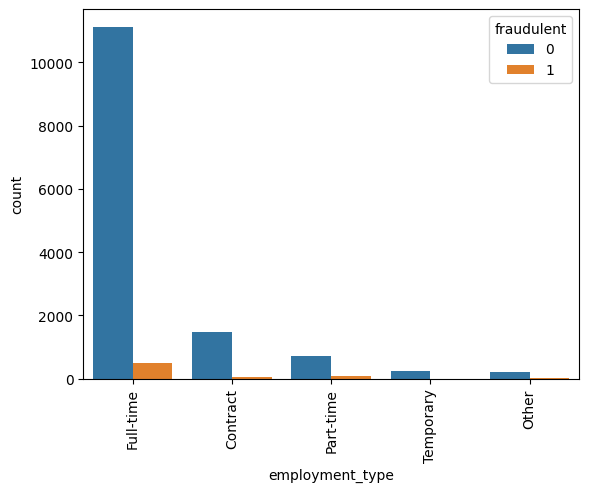

In [25]:
# Fraud posts based on employment type
sns.countplot(x=df['employment_type'],hue=df['fraudulent'],order=df['employment_type'].value_counts().iloc[:10].index)
plt.xticks(rotation=90);

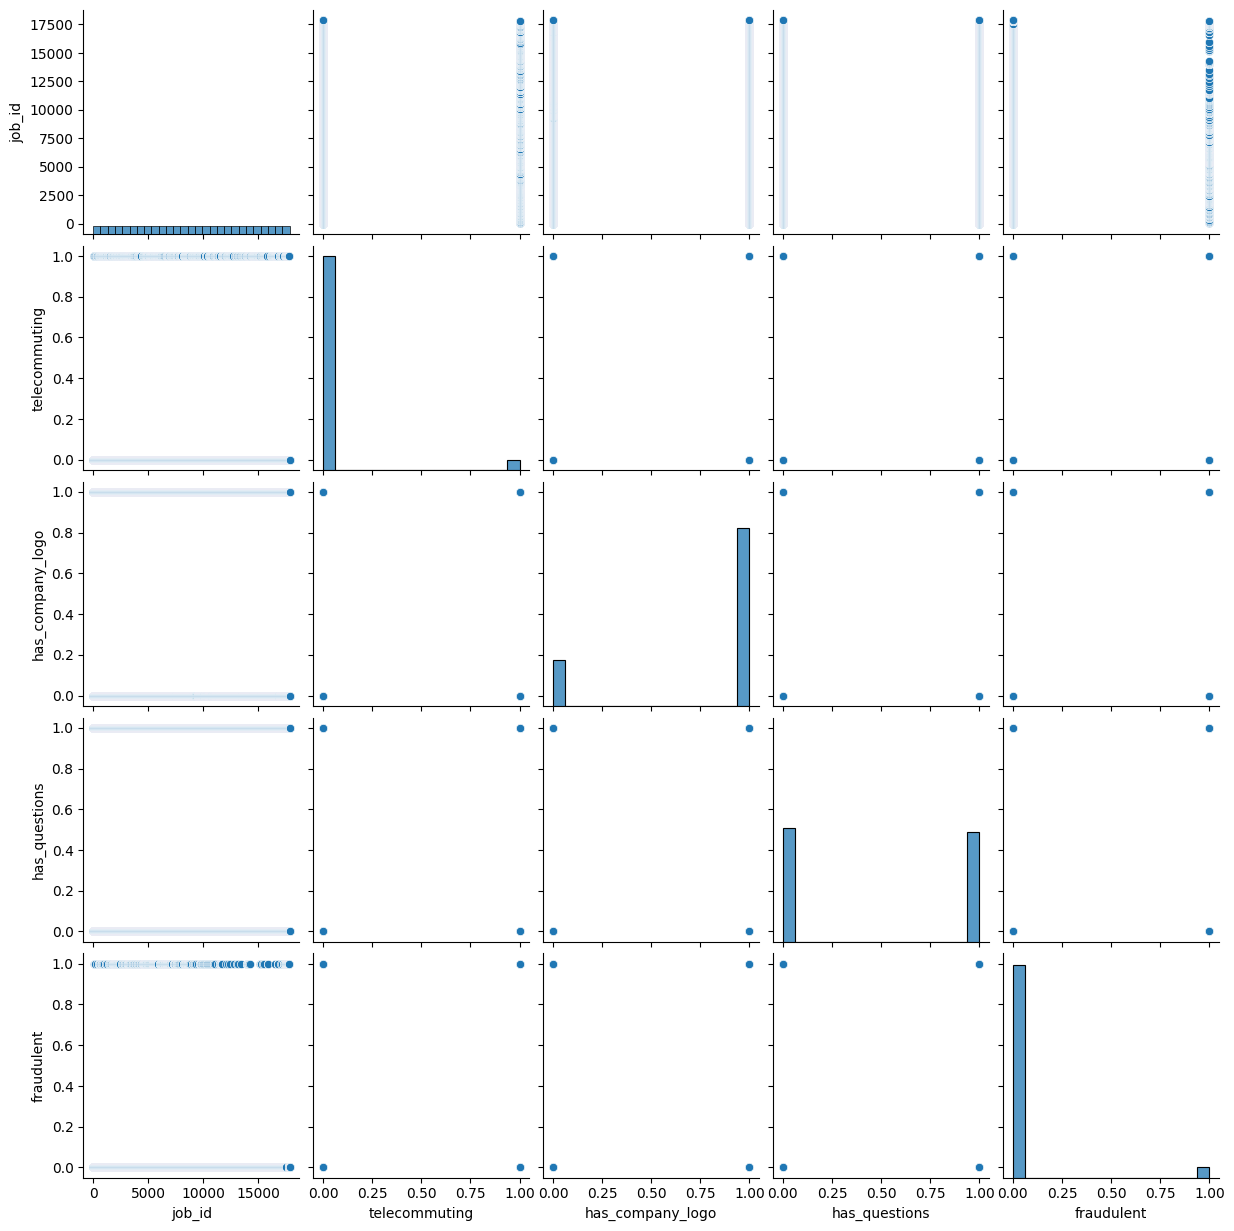

In [26]:
# All the numerical plots in data
sns.pairplot(df)

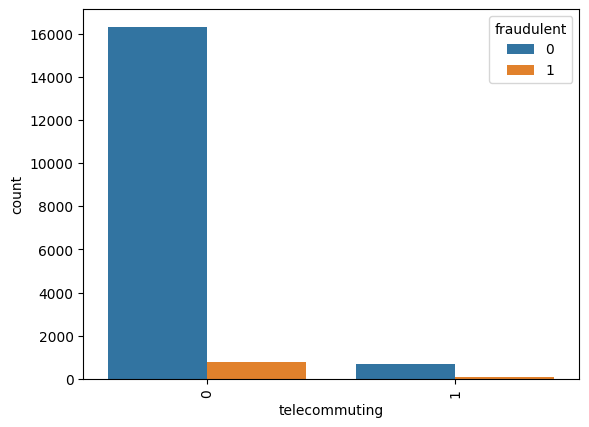

In [27]:
# Fraud posts through telecommunicating channel
sns.countplot(x=df['telecommuting'],hue=df['fraudulent'],order=df['telecommuting'].value_counts().iloc[:10].index)
plt.xticks(rotation=90);

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

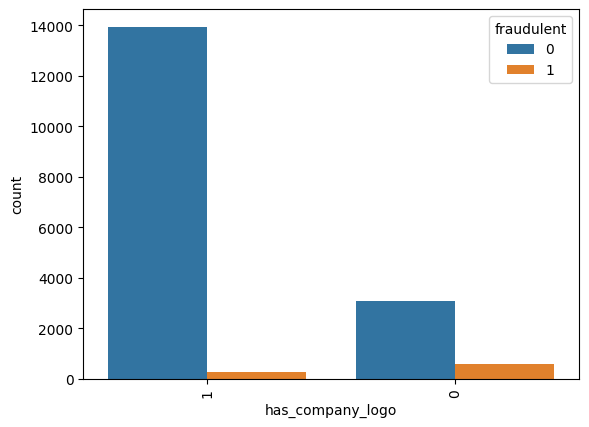

In [29]:
# Fraud posts whether the company has logo or not
sns.countplot(x=df['has_company_logo'],hue=df['fraudulent'],order=df['has_company_logo'].value_counts().iloc[:10].index)
plt.xticks(rotation=90);

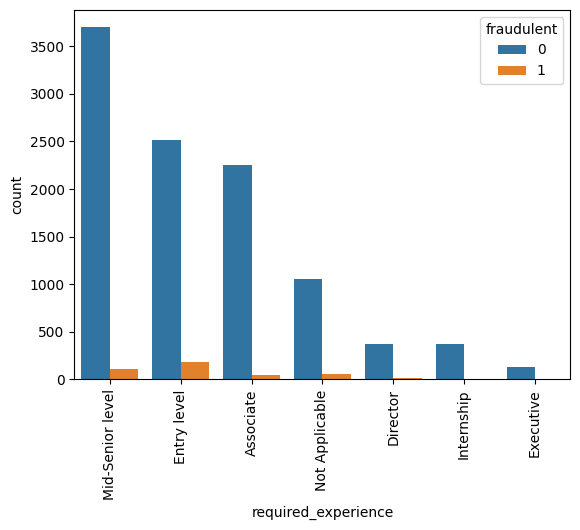

In [30]:
# Fraud posts based on experience level
sns.countplot(x=df['required_experience'],hue=df['fraudulent'],order=df['required_experience'].value_counts().index)
plt.xticks(rotation=90);

In [31]:
df.iloc[49:51]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
49,50,Customer Service Team Lead,"US, NH, Dover",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",We are currently seeking a Customer Service Te...,Required Qualifications:High school diploma or...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Facilities Services,Customer Service,0
50,51,"Food Production Manager @ PGI, a Food Producti...","US, NV, Carson City",Production,NaN,PGI is a fast growing organic herb/spice/botan...,"November, 2014Pure Ground Ingredients (PGI)in ...",Manager role requirements- Multi-lingual (Engl...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Food & Beverages,Production,0


In [32]:
df['benefits'].nunique()

6205

In [33]:
df.isna().mean()*100

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [34]:
df.select_dtypes(exclude=['number']).columns.tolist()

['title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function']

In [35]:
# filling the empty spaces with blanks, as all the text data columns are later merged together.
df.fillna(' ',inplace=True)

In [36]:
df.isna().mean()*100

job_id                 0.0
title                  0.0
location               0.0
department             0.0
salary_range           0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
dtype: float64

### Feature Engineering

In [37]:
# Merging all the text columns together to a single column text, for better tokenization and vectorization
df['text']=(df['location']+' '+df['department']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type']+' '+df['required_experience']+' '+df['required_education']+' '+df['industry']+' '+df['function'])

In [38]:
df1=df[['telecommuting','has_company_logo','has_questions','fraudulent','text']]

In [39]:
df1

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"US, NY, New York Marketing We're Food52, and w..."
1,0,1,0,0,"NZ, , Auckland Success 90 Seconds, the worlds ..."
2,0,1,0,0,"US, IA, Wever Valor Services provides Workfo..."
3,0,1,0,0,"US, DC, Washington Sales Our passion for impro..."
4,0,1,1,0,"US, FL, Fort Worth SpotSource Solutions LLC ..."
...,...,...,...,...,...
17875,0,1,1,0,"CA, ON, Toronto Sales Vend is looking for some..."
17876,0,1,1,0,"US, PA, Philadelphia Accounting WebLinc is the..."
17877,0,0,0,0,"US, TX, Houston We Provide Full Time Permane..."
17878,0,0,1,0,"NG, LA, Lagos Nemsia Studios is looking fo..."


In [40]:
# Cleaning the texts, removing stop words and lemmatizing them to a proper grammatical spellings

In [41]:
def clean_review(li):
    a=str(li.tolist()).lower()
    txt=re.sub(r'[^a-z0-9]+',' ',str(a)).strip()
    tokens=word_tokenize(txt)
    stop_words=stopwords.words('english')
    words=[t for t in tokens if t not in stop_words]
    lem=WordNetLemmatizer()
    l=[lem.lemmatize(w) for w in words]
    fd=FreqDist(l)
    return fd

In [42]:
fd=clean_review(df1['text'])

In [43]:
fd

FreqDist({'xa0': 228908, 'experience': 40236, 'team': 38380, 'work': 38264, 'service': 33949, 'company': 29089, 'time': 28841, 'customer': 28028, 'business': 24553, 'u': 24204, ...})

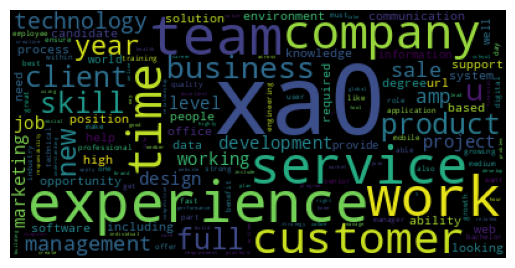

In [44]:
# Word Cloud showing the most fraud terms used in the job posts, bigger the term bigger the fraud appearance is
wc=WordCloud(background_color='black').generate_from_frequencies(fd)
plt.imshow(wc)
plt.axis('off');

In [45]:
# Count vectorizer to get the feature names
cv=CountVectorizer(stop_words='english',max_features=50,ngram_range=(2,2))
x=cv.fit_transform(df['text'].tolist())

In [46]:
cv.get_feature_names_out()

array(['ability work', 'able work', 'bachelor degree',
       'business development', 'communication skills',
       'competitive salary', 'computer science', 'computer software',
       'customer service', 'degree computer', 'entry level',
       'experience preferred', 'experience working', 'fast growing',
       'fast paced', 'financial services', 'health care', 'high quality',
       'high school', 'ideal candidate', 'information technology',
       'job description', 'join team', 'level bachelor', 'level high',
       'long term', 'mid senior', 'minimum years', 'new york',
       'problem solving', 'project management', 'san francisco',
       'school diploma', 'school equivalent', 'senior level',
       'skills ability', 'social media', 'software development',
       'team members', 'technology services', 'time associate',
       'time entry', 'time mid', 'track record', 'verbal written',
       'work closely', 'work environment', 'written communication',
       'written verbal',

In [47]:
cols=cv.get_feature_names_out()
dtm=pd.DataFrame(x.toarray(),columns=cols)
fd2=dtm.sum().to_dict()
fd2

{'ability work': 1958,
 'able work': 1301,
 'bachelor degree': 6386,
 'business development': 1387,
 'communication skills': 4042,
 'competitive salary': 1370,
 'computer science': 1365,
 'computer software': 1408,
 'customer service': 6665,
 'degree computer': 1343,
 'entry level': 3274,
 'experience preferred': 1244,
 'experience working': 1672,
 'fast growing': 1870,
 'fast paced': 2817,
 'financial services': 1512,
 'health care': 1251,
 'high quality': 1905,
 'high school': 3002,
 'ideal candidate': 1410,
 'information technology': 4151,
 'job description': 1345,
 'join team': 1396,
 'level bachelor': 2712,
 'level high': 1348,
 'long term': 1961,
 'mid senior': 3841,
 'minimum years': 1472,
 'new york': 2352,
 'problem solving': 1649,
 'project management': 1573,
 'san francisco': 1394,
 'school diploma': 1253,
 'school equivalent': 2090,
 'senior level': 4028,
 'skills ability': 1442,
 'social media': 3066,
 'software development': 1403,
 'team members': 1810,
 'technology servi

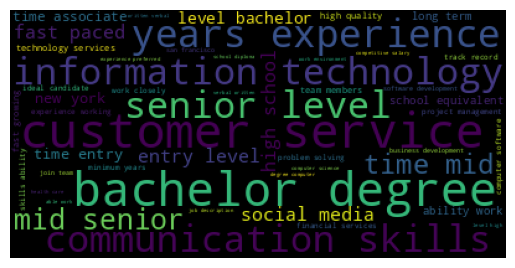

In [48]:
# getting the features
wc=WordCloud(background_color='black').generate_from_frequencies(fd2)
plt.imshow(wc)
plt.axis('off');

<ipython-input-49-707d0b376bfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['character_count'] = df1.text.apply(len)


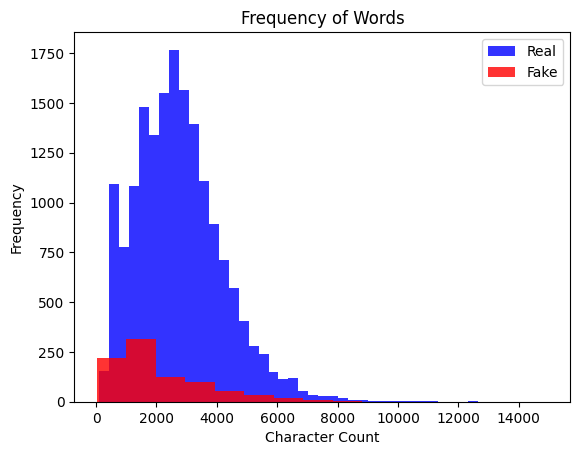

In [49]:
# The comparison between real and fake in terms of the distribution across characters and word count
df1['character_count'] = df1.text.apply(len)
df1[df1.fraudulent==0].character_count.plot(bins=45, kind='hist', color='blue',label='Real', alpha=0.8)
df1[df1.fraudulent==1].character_count.plot(kind='hist', color='red',label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

### Text Vectorization

In [50]:
df1

,telecommuting,has_company_logo,has_questions,fraudulent,text,character_count
0,0,1,0,0,"US, NY, New York Marketing We're Food52, and w...",2704
1,0,1,0,0,"NZ, , Auckland Success 90 Seconds, the worlds ...",6184
2,0,1,0,0,"US, IA, Wever Valor Services provides Workfo...",2627
3,0,1,0,0,"US, DC, Washington Sales Our passion for impro...",5522
4,0,1,1,0,"US, FL, Fort Worth SpotSource Solutions LLC ...",4039
...,...,...,...,...,...,...
17875,0,1,1,0,"CA, ON, Toronto Sales Vend is looking for some...",5358
17876,0,1,1,0,"US, PA, Philadelphia Accounting WebLinc is the...",4827
17877,0,0,0,0,"US, TX, Houston We Provide Full Time Permane...",2794
17878,0,0,1,0,"NG, LA, Lagos Nemsia Studios is looking fo...",1303


In [51]:
X = df1[['telecommuting', 'has_company_logo', 'text', 'character_count']]
y = df1['fraudulent']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_num = X_train[['telecommuting', 'has_company_logo', 'character_count']]
X_test_num = X_test[['telecommuting', 'has_company_logo', 'character_count']]

In [53]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [54]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=1)
tfidf_train = tfidf_vectorizer.fit_transform(X_train.text)
tfidf_test = tfidf_vectorizer.transform(X_test.text)

### Contextual Embedding Model:

Text(0.5, 1.0, 'BERT Embeddings')

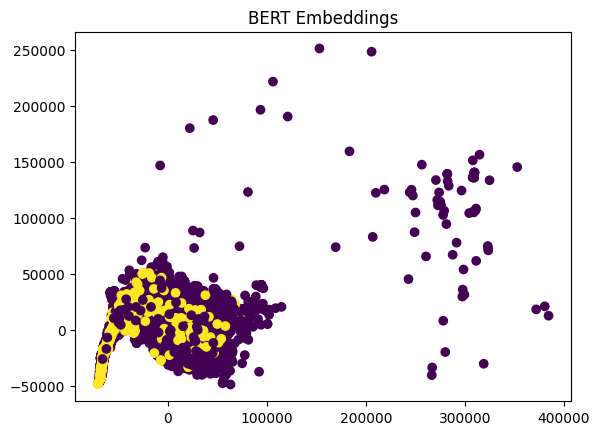

In [55]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text_embeddings = tokenizer(df1['text'].tolist(), padding=True, truncation=True, return_tensors='pt')
bert_embeddings = text_embeddings['input_ids']
pca = PCA(n_components=2)
bert_embeddings_2d = pca.fit_transform(bert_embeddings)
plt.scatter(bert_embeddings_2d[:,0], bert_embeddings_2d[:,1], c=df1['fraudulent'])
plt.title("BERT Embeddings")

### Text Classification

In [56]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

In [57]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.9739000745712155

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5123
           1       0.83      0.53      0.65       241

    accuracy                           0.97      5364
   macro avg       0.90      0.76      0.82      5364
weighted avg       0.97      0.97      0.97      5364



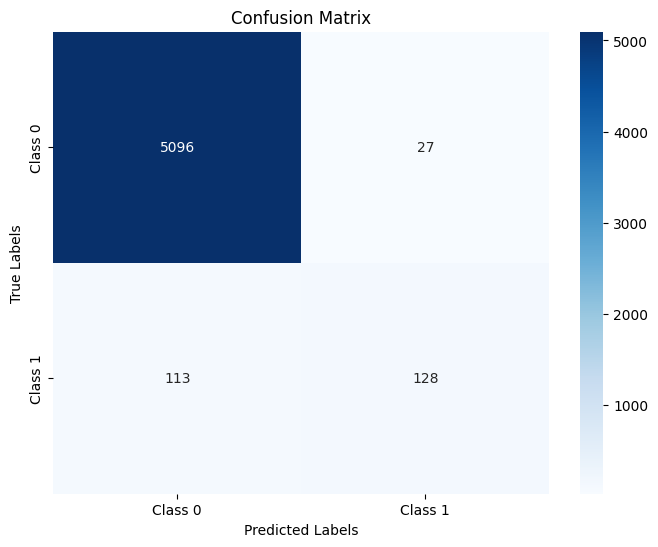

In [59]:
conf_matrix = confusion_matrix(y_test,pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
metrics.f1_score(y_test, pred)

0.6464646464646464

In [61]:
clf_log = SGDClassifier(loss='log').fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9845264727815063

In [62]:
clf_num = SGDClassifier(loss='log').fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.9552572706935123

In [63]:
prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)
metrics.accuracy_score(y_test, prediction_array)

0.9847129008202834

In [64]:
metrics.f1_score(y_test, prediction_array)

0.8217391304347826

In [65]:
print(classification_report(y_test, prediction_array))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5123
           1       0.86      0.78      0.82       241

    accuracy                           0.98      5364
   macro avg       0.93      0.89      0.91      5364
weighted avg       0.98      0.98      0.98      5364



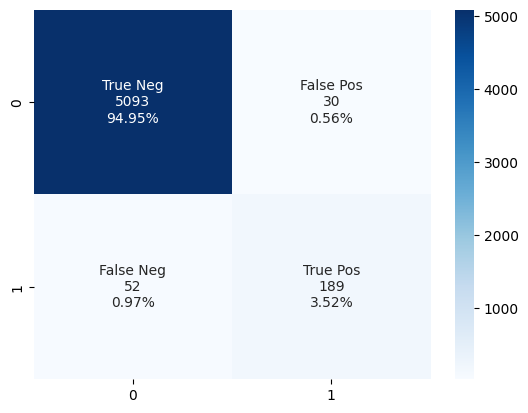

In [66]:
cf_matrix = confusion_matrix(y_test, prediction_array)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');